In [1]:
import geoplanar
import geopandas

/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


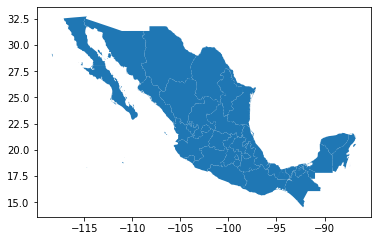

In [3]:
mexico = geopandas.read_file("mex_admbnda_adm1_govmex_20210618.shp")
mexico.plot()

In [4]:
import libpysal

In [5]:
us = libpysal.examples.load_example('us_income')

In [6]:
us.get_file_list()

['/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/libpysal/examples/us_income/spi_download.csv',
 '/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/libpysal/examples/us_income/usjoin.csv',
 '/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/libpysal/examples/us_income/states48.gal',
 '/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/libpysal/examples/us_income/README.md',
 '/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/libpysal/examples/us_income/us48.shx',
 '/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/libpysal/examples/us_income/us48.shp',
 '/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/libpysal/examples/us_income/us48.dbf']

In [7]:
us = geopandas.read_file(us.get_path("us48.shp"))

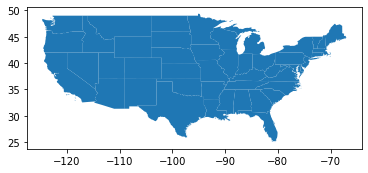

In [8]:
us.plot()

In [9]:
usmex = us.append(mexico)

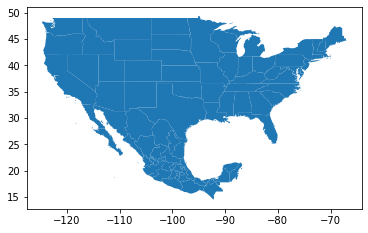

In [10]:
usmex.plot()

In [11]:
usmex.head()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,ADM1_ES,...,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area
0,20.750,34.956,1.0,1.0,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45.132,34.527,2.0,2.0,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.571,18.899,3.0,3.0,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.874,21.353,4.0,4.0,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22.598,22.746,5.0,5.0,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
usmex.shape

(80, 21)

In [13]:
usmex.tail()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,ADM1_ES,...,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-97.85930 22.62479, -97.85996 ...",Tamaulipas,...,None,None,None,MÃ©xico,MX,2020-06-23,2021-06-18,None,49.330438,6.945034
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-98.04644 19.70788, -98.04605 19.707...",Tlaxcala,...,None,None,None,MÃ©xico,MX,2020-06-23,2021-06-18,None,3.891584,0.343837
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-94.93373 17.40204, -94.93327 ...",Veracruz de Ignacio de la Llave,...,None,None,None,MÃ©xico,MX,2020-06-23,2021-06-18,None,56.411380,6.071714
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-89.89022 21.23332, -89.89034 ...",YucatÃ¡n,...,Yucatan,None,None,MÃ©xico,MX,2020-06-23,2021-06-18,None,11.465609,3.420315
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-101.84881 25.01762, -101.84131 24.9...",Zacatecas,...,None,None,None,MÃ©xico,MX,2020-06-23,2021-06-18,None,29.868667,6.644907


We have appended the Mexico gdf to the US gdf. For now, however, we are going to zoom in on a subset of the border region to investigate things further:

In [23]:
from shapely.geometry import box

clipper = geopandas.GeoDataFrame(geometry =[box(-100, 25, -97, 30)])


In [24]:
usborder = geopandas.clip(clipper, us)
mexborder = geopandas.clip(clipper, mexico)

<ipython-input-24-990b07eb69ec>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  mexborder = geopandas.clip(clipper, mexico)


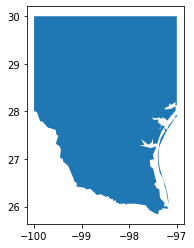

In [25]:
usborder.plot()

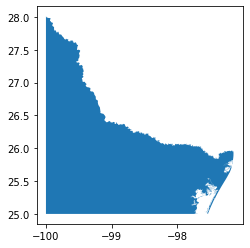

In [26]:
mexborder.plot()

In [27]:
usmex = usborder.append(mexborder)
usmex.reset_index(inplace=True)

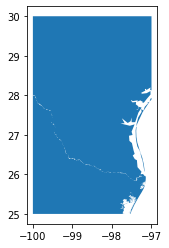

In [28]:
usmex.plot()

In [22]:
usmex = usborder.append(mexborder)
usmex.reset_index(inplace=True)
usmex['COUNTRY'] = ["US", "MEXICO"]

usmex.area

0    42.837167
1    51.649657
dtype: float64